In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [3]:
N = 1000 
gaussian_quantiles = make_gaussian_quantiles(n_samples= N, mean=None, cov = 0.1, n_features=2, n_classes=2, shuffle=True, random_state=None)

In [4]:
X, Y = gaussian_quantiles
X.shape, Y.shape

((1000, 2), (1000,))

In [5]:
Y = Y[:, np.newaxis]

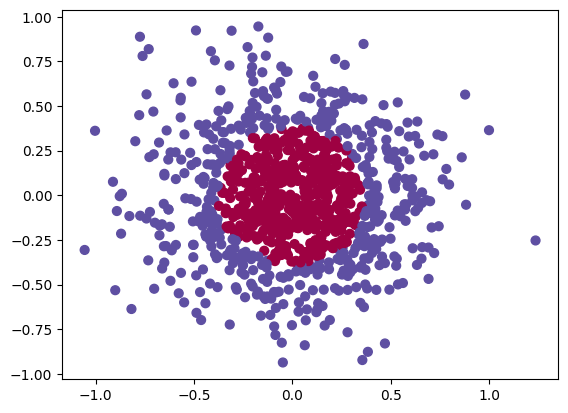

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.show()

# Activation functions

In [7]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1) **2)
    else:
        return 1 / (1 + np.exp(-x))
    
def relu(x, derivate = False):
    if derivate:
        x[X <= 0] = 0
        x[X > 0] = 1
        return x
    else:
        return np.maximum(0, x)

# Loss function

In [8]:
def mse(y, y_hat, derivate = False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y) ** 2)

In [9]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
        parameters['b' + str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
    return parameters
    

In [10]:
layer_dims = [2, 4, 8, 2]

In [11]:
params = initialize_parameters_deep(layer_dims)

In [12]:
params

{'W1': array([[-0.73084385,  0.6390365 ,  0.34612476,  0.9775476 ],
        [-0.37293482,  0.92397428,  0.1357199 ,  0.30433768]]),
 'b1': array([[0.09945688, 0.55659447, 0.43660209, 0.66402472]]),
 'W2': array([[ 0.3368327 ,  0.71061956,  0.43744179, -0.81673085, -0.62251836,
         -0.39308499, -0.08240299,  0.51117935],
        [-0.82511995,  0.53030402,  0.6799395 , -0.4872173 ,  0.79012663,
          0.68149747,  0.26006593,  0.04846011],
        [-0.48822465, -0.30560157, -0.02916407, -0.32541954, -0.66873395,
          0.93008971,  0.11239805,  0.51836192],
        [ 0.19589007, -0.50268088, -0.32506539,  0.34563861,  0.0364912 ,
         -0.13083126,  0.43586225, -0.67619323]]),
 'b2': array([[-0.10698647,  0.45661408, -0.16361833,  0.80325764,  0.28024538,
         -0.77982791,  0.60235538, -0.89450934]]),
 'W3': array([[-0.2759001 , -0.85728436],
        [ 0.01222233,  0.1411233 ],
        [ 0.58946705, -0.64244688],
        [ 0.25998995, -0.22427096],
        [-0.53706878,

In [13]:
params['W1'].shape

(2, 4)

In [14]:
X.shape

(1000, 2)

In [15]:
np.matmul(X, params['W1'])

array([[ 0.38071532, -0.41981579, -0.17435884, -0.48095394],
       [-0.39387794,  0.49944355,  0.17593271,  0.47640161],
       [-0.03828644, -0.23662483,  0.03660958,  0.13907113],
       ...,
       [ 0.04624383,  0.04424446, -0.02769368, -0.089399  ],
       [ 0.21025719, -0.49956485, -0.07797905, -0.17853196],
       [ 0.20545666, -0.45590274, -0.07840525, -0.18494831]],
      shape=(1000, 4))

In [16]:
X@params['W1']

array([[ 0.38071532, -0.41981579, -0.17435884, -0.48095394],
       [-0.39387794,  0.49944355,  0.17593271,  0.47640161],
       [-0.03828644, -0.23662483,  0.03660958,  0.13907113],
       ...,
       [ 0.04624383,  0.04424446, -0.02769368, -0.089399  ],
       [ 0.21025719, -0.49956485, -0.07797905, -0.17853196],
       [ 0.20545666, -0.45590274, -0.07840525, -0.18494831]],
      shape=(1000, 4))

In [17]:
## Forward

params['A0'] = X
        
params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
params['A1'] = relu(params['Z1'])
    
params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])
       
params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
params['A3'] = sigmoid(params['Z3'])
  
output = params['A3']

In [19]:
output.shape

(1000, 2)